# INFO371 Final Exam/Winter 2019
Score: 20/20

## Introduction

This is the final exam. As you can see, it is heavily influenced from PS4 and 6. Rules:
- You may use all available materials, including internet sources
- You must not communicate with the others. This is an individual exam.
- References must be appropriately cited. Links to solutions copied from websites, such as StackOverflow must be provided in code comments. If you are re-using code from your previous problem sets, mention it.
- You have to sign the compliance form, attached on the last page, and return it together with the rest of the exam (a cellphone photo of the signed form is OK).
- Please explain your answers and show all your work; a complete argument must be presented to obtain full credit.
- All plots must be appropriately labeled, and appropriate colors/labels/font sizes must be used. Here I mean appropriate for thYs exam, it does not conform to the looong explanations in Science journal.
- You can instructors if you are stuck with something. I want you to spend most of the time on ML problems, not on an obscure technical issue. However, it's somewhat limited how much help we can offer.
The exam contains 2 questions. The first one uses Boston Housing data, the second one is about text classification of newgroup articles (and the data is probably new to you). I expect you to use existing packages and not implement any code yourself. But you are welcome to, and you are also welcome to explore other avenues besides strictly asked below.
As always, please submit your results in two ways: as a code (notebook/markdown/...) and as a final version (html/pdf/...).
Good luck!

## Regression (10pt)

Your first task is to demonstrate your skills on the good old (and boring) Boston housing data. You estimate Boston house prices (medv) using all other features as predictors. Use cross-validation to establish the best predictor, we don't spend time on a separate testing data here.
I expect you to use existing packages and functions, not to implement the methods yourself. However, feel free implement your own, or to re-use something you have done for a previous problem set.

1) Load Boston data. It's located in R packages MASS (just use MASS::Boston), and in sklearn where you can load it as

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
bdata = load_boston()
X = bdata.data
y = bdata.target

In [19]:
# check also boston.feature_names and other information
print('keys:', bdata.keys())
print('\nfeature names:', bdata.feature_names)
print('\ndata shape:', bdata.data.shape)
print('\ntarget shape:', bdata.target.shape)

keys: dict_keys(['data', 'target', 'feature_names', 'DESCR'])

feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

data shape: (506, 13)

target shape: (506,)


Ensure that target MEDV is separated from data, and all features are numeric (this is already the case if you use sklearn).

In [25]:
boston = pd.DataFrame(bdata.data)
boston.columns = bdata.feature_names[:]
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
# Are all features numeric?
print(boston.dtypes, "\n")

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object 



2) List all relevant methods you know (and we covered in the class) for predicting MEDV based on this data. In each case also discuss the strenghs and weaknesses of the methods, and list the most important hyperparameters you may consider (more complex methods may have very large number of hyperparameters, so you don't want to list them all). Also, do not consider the optimizer and related tolerances as a hyperparameters.

**kNN**:

Important hyperparameters: The k in k-nearest neighbors.

Strengths: simple and surprisingly flexible if you pre-process your data and engineer useful features.

Weaknesses: you need to specify the number of neighbors/clusters, which isn't always easy to do

**Logistic**:

Important hyperparameters: The penalty and C in logistic.

Strengths: algorithm can be regularized to avoid overfitting, nice probabilistic interpretation

Weaknesses: tends to underperform when there are multiple or non-linear decision boundaries, can't catch complexity

**Lasso**:

Important hyperparameters: alpha

Strengths: majorly used to prevent overfitting, sets less important predictors to zero and helps you with choosing the predictors that can be left out of the model

Weaknesses: In many analyses, it can be important to include *all* variables and not drop the ones that do not have significance in the predicting. They could be necessary control variables or their small effect could hold a large significance

**Ridge**:

Important hyperparameters:: alpha

Strengths: majorly used to prevent overfitting by adding a penalty to models that have too large coefficients 

Weaknesses: Since it includes all the features, it is not very useful in case of exorbitantly high features, say in millions, as it will pose computational challenges.

**OLS**:

Important hyperparameters: there is none. The number/choice of features is not a hyperparameter, but can be viewed as a post processing or iterative tuning process.

Strengths: can be regularized to avoid overfitting, very useful on a huge amount of features where better algorithms suffer from overfitting

Weaknesses: performs poorly when there are non-linear relationships (can't catch complexity)

3) Use at least three of the methods you listed to predict MEDV based on other attributes. Ideas: OLS, k-NN, trees, Lasso, compare normalized-versus non-normalized features, try different distance metrics.

In each case:

(a) select a relevant measure of goodness, such as RMSE or R2. 

(b) loop over selected hyperparameters.

(c) cross-validate your result using the selected goodness measure and pick the best set of hyper- parameters.

4) Present your results a table, or a graph, or another easily accessible summary.

In [134]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
scores = {'k': [], 'score': []}

for i in k:
    neigh = KNeighborsRegressor(n_neighbors=i).fit(X_train, y_train)
    scores['k'].append(i)
    scores['score'].append(neigh.score(X_val, y_val))

scores = pd.DataFrame(scores)   
scores

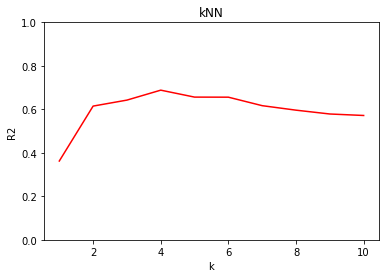

In [136]:
plt.plot(scores['k'], scores['score'], c = 'red')
plt.xlabel("k")
plt.ylabel("R2")
plt.title("kNN")
plt.ylim((0, 1))
plt.show()

In [137]:
from sklearn.linear_model import Ridge
alphas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
scores = {'alpha': [], 'score': []}

for i in alphas:
    ridgereg = Ridge(alpha = i, normalize=True)
    ridgereg.fit(X_train, y_train)
    scores['alpha'].append(i)
    scores['score'].append(ridgereg.score(X_val, y_val))
    
scores = pd.DataFrame(scores)   
scores

,alpha,score
0,0.0,0.767482
1,0.1,0.783993
2,0.2,0.781521
3,0.3,0.775130
4,0.4,0.767020
5,0.5,0.758054
6,0.6,0.748680
7,0.7,0.739154
8,0.8,0.729632
9,0.9,0.720208


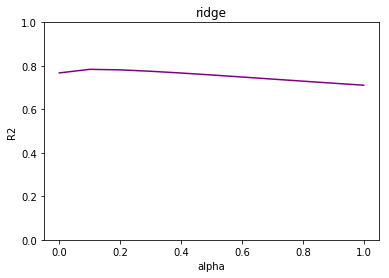

In [139]:
plt.plot(scores['alpha'], scores['score'], c = 'purple')
plt.xlabel("alpha")
plt.ylabel("R2")
plt.title("ridge")
plt.ylim((0, 1))
plt.show()

In [94]:
from sklearn.linear_model import Lasso

scores = {'alpha': [], 'score': []}
for i in alphas:
    lassoreg = Lasso(alpha = i, normalize=True)
    lassoreg.fit(X_train, y_train)
    scores['alpha'].append(i)
    scores['score'].append(lassoreg.score(X_val, y_val))
    
scores = pd.DataFrame(scores)   
scores

/Users/yasmine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Users/yasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/yasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,alpha,score
0,0.0,0.740608
1,0.1,0.582783
2,0.2,0.341435
3,0.3,0.004698
4,0.4,0.000000
5,0.5,0.000000
6,0.6,0.000000
7,0.7,0.000000
8,0.8,0.000000
9,0.9,0.000000


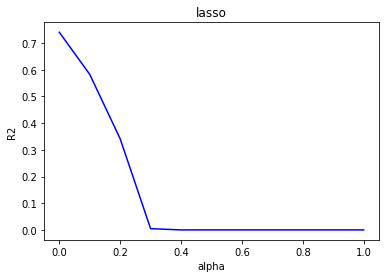

In [95]:
plt.plot(scores['alpha'], scores['score'], c = 'blue')
plt.xlabel("alpha")
plt.ylabel("R2")
plt.title("lasso")
plt.show()

5) Comment your results. Which methods performed best? Can you explain why?

For the cross-validation I performed, I got that Ridge was the best model of the 3, with alpha = 1. We see better performance than Lasso and knn as well with different alphas for Ridge. The best R^2 Coeff we get with alpha = 1 is .784. This may be because ridge is able to normalize while including all the features. kNN performed better before cross-validation, and it performed better when I did different cross validations. This can be because there's not much overlap in the data, so kNN with fewer neighbors can easily pick this up.

## Text Classification (10p)

This question is a compilation of your PS4 and PS6. Your task is to categorize texts into newgroups (there are 20 newsgroups) using k-NN and Naive Bayes methods. I expect you to use the existing stock libraries but you are welcome to amend what you implemented yourself. We follow the testing data approach, so you are supposed to split the data, keep testing data well away, and at the end report the final performance.
The data is from UCI ML library and you can read a brief description there. Note that it includes many traits that make it unfairly nice for NB compared to k-NN. I have done my best to strip it from sensitive information, but it still contains a large number of names, phone numbers, etc, that may hint very well which newsgroup a text belongs to. The cleaned data is converted into a csv file with two attributes: group is the name of the newsgroup, and text is the text itself. There are 20k texts in the sample.
Tasks:

1) Load the data and save a random subsample (∼ 20%) of it away as testing data. Note: if you know that your computer is slow and you struggled with the data size in PS4 and PS6, you may as well store (say) 75% of it as testing data, or just work on a much smaller sample. On my old desktop, the full run of all models takes ∼ 5 mins and no more than 3G of RAM.

In any case, if you cut your sample, please state it clearly along the lines: I chose to work on a subsample of 5000 texts only.

Hint: *CountVectorizer* returns a sparse matrix. Keep it sparse. You save a lot of memory (and improve speed).

In [7]:
newsgroups = pd.read_csv("20-newsgroups.csv")
newsgroups.head()

,group,text
0,alt.atheism,Atheist Resources Addresses of Atheist Organ...
1,alt.atheism,--BEGIN PGP SIGNED MESSAGE-- An Introduction ...
2,alt.atheism,"In article (Charley Wingate) writes: Well, J..."
3,alt.atheism,(..until kings become philosophers or philoso...
4,alt.atheism,"In article (Bob McGwier) writes: [1] HOWEVER,..."


In [8]:
newsgroups.text = newsgroups.text.astype(str)
newsgroups.group = newsgroups.group.astype(str)

In [46]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(newsgroups, test_size=0.50, random_state=42)

In [47]:
test.to_csv(path_or_buf='test.csv', index = False)
del test

In [11]:
len(train)

9998

2) Convert the texts into bag-of-words (no TF-IDF here) and use k-NN with cosine similarity for categorization. Find the best k through CV while trying to maximize accuracy.

Hints: sklearn's KNeighborsClassifier does not mention cosine metrics. However, it works for me (and is mentioned under sklearn.neighbors.NearestNeighbors).

When you use pd.read_csv, the text may end up of type object and confuse the vectorizer and other text functions. Convert it to str type with something like string = text.astype('str').

In [44]:
X_train = train[['text']]
y_train = train[['group']]
param = range(1, 11)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import time

In [14]:
def split_data_frame(df, num_chunks): 
    listOfDf = list()
    chunk_size = len(df) // num_chunks
    for i in range(num_chunks):
        listOfDf.append(df[i*chunk_size:(i+1)*chunk_size])
    return listOfDf

In [22]:
def cross_val(data, k_chunks, k):
    print('Number of chunks:', k_chunks)
    print('k:', k)
    
    chunks = split_data_frame(data, k_chunks)
    accuracy_list = []
    for chunk_df in chunks:
        tmp_train = data[~data.isin(chunk_df)]
        X_train = tmp_train.text.astype(str)
        y = tmp_train.group.astype(str)

        y_output = chunk_df.group
        
        # initialize the vectorizer
        vectorizer = CountVectorizer(min_df=0)
        # create the dictionary
        vectorizer.fit(X_train)
        # `fit` builds the vocabulary
        # transform your data into the BOW array
        X = vectorizer.transform(X_train).toarray()
        words_list = list(vectorizer.get_feature_names())
    
        # fit knn
        neigh = KNeighborsClassifier(n_neighbors = k)
        neigh.fit(X, y_train)
        
        
        X_val = vectorizer.transform(chunk_df.text)
        predicted = neigh.predict(X_val)

        accuracy = metrics.accuracy_score(y_output, predicted) * 100
        accuracy_list.append(accuracy)
       
        print('Accuracy:', accuracy)
    print('Average accuracy:', np.mean(accuracy_list))
    print('------')

In [26]:
for t in param:
    start = time.time()
    cross_val(train, 5, t)
    end = time.time()
    print("Time elapsed:", end - start)

Number of chunks: 5
k: 1


/Users/yasmine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy: 37.8189094547
Accuracy: 36.8184092046
Accuracy: 37.0185092546
Accuracy: 38.2191095548
Accuracy: 36.4182091046
Average accuracy: 37.2586293147
------
Time elapsed: 420.0792419910431
Number of chunks: 5
k: 2
Accuracy: 33.0665332666
Accuracy: 31.715857929
Accuracy: 32.9664832416
Accuracy: 33.1165582791
Accuracy: 32.316158079
Average accuracy: 32.6363181591
------
Time elapsed: 423.1376988887787
Number of chunks: 5
k: 3
Accuracy: 31.6658329165
Accuracy: 30.5152576288
Accuracy: 31.2156078039
Accuracy: 32.116058029
Accuracy: 31.1655827914
Average accuracy: 31.3356678339
------
Time elapsed: 410.5582060813904
Number of chunks: 5
k: 4
Accuracy: 30.1650825413
Accuracy: 28.7643821911
Accuracy: 29.9649824912
Accuracy: 31.9659829915
Accuracy: 30.4652326163
Average accuracy: 30.2651325663
------
Time elapsed: 426.17114996910095
Number of chunks: 5
k: 5
Accuracy: 29.9149574787
Accuracy: 28.5142571286
Accuracy: 29.8649324662
Accuracy: 30.9154577289
Accuracy: 30.4152076038
Average accuracy: 

3) Now repeat the exact same exercise with TF-IDF. I expect you to use TF-IDF vectorizer, but you are welcome to use your own implementation. Note, however, that sklearn-s TF-IDF definition differs slightly from Murphy's, the one we used in PS4.

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_cross_val(data, k_chunks, k):
    print('Number of chunks:', k_chunks)
    print('k:', k)
    
    chunks = split_data_frame(data, k_chunks)
    accuracy_list = []
    for chunk_df in chunks:
        tmp_train = data[~data.isin(chunk_df)]
        X_train = tmp_train.text.astype(str)
        y = tmp_train.group.astype(str)

        y_output = chunk_df.group
        
        # initialize the vectorizer
        vectorizer = TfidfVectorizer()
        # create the dictionary
        vectorizer.fit(X_train)
        # `fit` builds the vocabulary
        # transform your data into the BOW array
        X = vectorizer.transform(X_train).toarray()
        words_list = list(vectorizer.get_feature_names())
    
        # fit knn
        neigh = KNeighborsClassifier(n_neighbors = k)
        neigh.fit(X, y_train)
        
        
        X_val = vectorizer.transform(chunk_df.text)
        predicted = neigh.predict(X_val)

        accuracy = metrics.accuracy_score(y_output, predicted) * 100
        accuracy_list.append(accuracy)
       
        print('Accuracy:', accuracy)
    print('Average accuracy:', np.mean(accuracy_list))
    print('------')

In [32]:
for t in param:
    start = time.time()
    tfidf_cross_val(train, 5, t)
    end = time.time()
    print("Time elapsed:", end - start)

Number of chunks: 5
k: 1


/Users/yasmine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy: 72.136068034
Accuracy: 71.2356178089
Accuracy: 70.6353176588
Accuracy: 71.7858929465
Accuracy: 70.4852426213
Average accuracy: 71.2556278139
------
Time elapsed: 398.2660291194916
Number of chunks: 5
k: 2
Accuracy: 68.7843921961
Accuracy: 67.6338169085
Accuracy: 67.1835917959
Accuracy: 69.4847423712
Accuracy: 64.9324662331
Average accuracy: 67.603801901
------
Time elapsed: 383.16657519340515
Number of chunks: 5
k: 3
Accuracy: 68.9344672336
Accuracy: 67.4337168584
Accuracy: 66.4332166083
Accuracy: 69.9849924962
Accuracy: 65.5327663832
Average accuracy: 67.663831916
------
Time elapsed: 389.0017430782318
Number of chunks: 5
k: 4
Accuracy: 68.2341170585
Accuracy: 66.9334667334
Accuracy: 65.2826413207
Accuracy: 68.384192096
Accuracy: 64.4822411206
Average accuracy: 66.6633316658
------
Time elapsed: 381.80662298202515
Number of chunks: 5
k: 5
Accuracy: 67.3336668334
Accuracy: 66.7333666833
Accuracy: 65.6828414207
Accuracy: 68.4842421211
Accuracy: 64.5822911456
Average accuracy: 

4) Third, repeat the above using Naive Bayes. Let's stay with the BOW representation where we have word counts (unless you explicitly requested something else, you already have it from the first k-NN). Here you should 􏰀nd the optimal smoothing parameter.

In [41]:
def nb_cross_val(data, k_chunks, k):
    print('Number of chunks:', k_chunks)
    print('alpha:', k)
    
    chunks = split_data_frame(data, k_chunks)
    accuracy_list = []
    for chunk_df in chunks:
        tmp_train = data[~data.isin(chunk_df)]
        X_train = tmp_train.text.astype(str)
        y = tmp_train.group.astype(str)

        y_output = chunk_df.group
        
        # initialize the vectorizer
        vectorizer = CountVectorizer(min_df=0)
        # create the dictionary
        vectorizer.fit(X_train)
        # `fit` builds the vocabulary
        # transform your data into the BOW array
        X = vectorizer.transform(X_train).toarray()
        words_list = list(vectorizer.get_feature_names())
    
        # fit nb
        nb = MultinomialNB(alpha = k)
        nb.fit(X, y_train)
        
        
        X_val = vectorizer.transform(chunk_df.text)
        predicted = nb.predict(X_val)

        accuracy = metrics.accuracy_score(y_output, predicted) * 100
        accuracy_list.append(accuracy)
       
        print('Accuracy:', accuracy)
    print('Average accuracy:', np.mean(accuracy_list))
    print('------')

In [45]:
for t in param:
    start = time.time()
    nb_cross_val(train, 5, t)
    end = time.time()
    print("Time elapsed:", end - start)

Number of chunks: 5
alpha: 1


/Users/yasmine/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 67.047891351
Accuracy: 63.9027877055
Accuracy: 68.1915654039
Accuracy: 66.6904932094
Accuracy: 64.0457469621
Average accuracy: 65.9756969264
------
Time elapsed: 104.5196008682251
Number of chunks: 5
alpha: 2
Accuracy: 52.3230879199
Accuracy: 48.820586133
Accuracy: 55.5396711937
Accuracy: 54.896354539
Accuracy: 49.3924231594
Average accuracy: 52.194424589
------
Time elapsed: 104.20132398605347
Number of chunks: 5
alpha: 3
Accuracy: 43.1736954968
Accuracy: 40.2430307362
Accuracy: 48.3917083631
Accuracy: 46.5332380272
Accuracy: 41.815582559
Average accuracy: 44.0314510365
------
Time elapsed: 102.9996452331543
Number of chunks: 5
alpha: 4
Accuracy: 37.2408863474
Accuracy: 34.5961401001
Accuracy: 43.1736954968
Accuracy: 40.1000714796
Accuracy: 36.8834882059
Average accuracy: 38.3988563259
------
Time elapsed: 103.53547286987305
Number of chunks: 5
alpha: 5
Accuracy: 33.5239456755
Accuracy: 31.6654753395
Accuracy: 40.1000714796
Accuracy: 35.9542530379
Accuracy: 32.6661901358
Ave

5) Discuss the findings. Which model showed the best behaviour? Which one has the fastest speed? Decide which one is your best model for the last step:

The model that showed the best behavior was **TF-IDF kNN**, with an k of k=1. The best average accuracy score we received with this model while implementing k-fold CV with 5 k-chunks was **71.26**. The model that has the fastest speed from our performance was **naive bayes** (average speed = ~103 seconds). For the last step, we will use the former model.

(Disclaimer: for the speed, I had to lower the training set size for the naive bayes model because I was running out of time for this final. The previous 2 took over an hour each to run, as shown in the times above, so I couldn't wait another hour to finish this by the deadline. My best guess is that naive bayes would still be the fastest model, just by looking at previous problem sets).

6) Finally, analyze you model's performance on the testing data. load your testing data and compute the final accuracy.

In [48]:
test = pd.read_csv("test.csv")
test.text = test.text.astype(str)
test.group = test.group.astype(str)

In [50]:
X_train = train.text
y_train = train.group

# initialize the vectorizer
vectorizer = CountVectorizer(min_df=0)
# create the dictionary
vectorizer.fit(X_train)
# `fit` builds the vocabulary
# transform your data into the BOW array
X = vectorizer.transform(X_train).toarray()

# fit knn
neigh = KNeighborsClassifier(n_neighbors = 1, algorithm = 'brute')
neigh.fit(X, y_train)

X_test = vectorizer.transform(test.text)
y_test = test.group
predicted = neigh.predict(X_test)


accuracy = metrics.accuracy_score(y_test, predicted) * 100
print('accuracy', accuracy)

accuracy 41.5341534153


Sadly, even though we got a good accuracy like explained above, the accuracy for the final model was really bad. :( With more time, I could play around with this and see what else I could get.

7) Besides the final accuracy, compare some of the misclassified cases. What do you think what and why did the model get these wrong?

Note: I mean some sort of informal list of some of the misclassified cases, not a comprehensive analysis. Confusion matrix may not work well as we have 20 different groups here.

In [56]:
misc = np.array(y_test)[p.where(y_test != predicted)]
unique, counts = np.unique(misc, return_counts = True)
pd.DataFrame(unique, counts)

,0
304,alt.atheism
342,comp.graphics
304,comp.os.ms-windows.misc
330,comp.sys.ibm.pc.hardware
319,comp.sys.mac.hardware
310,comp.windows.x
321,misc.forsale
313,rec.autos
291,rec.motorcycles
265,rec.sport.baseball


The most misclassified group was **comp.graphics** from the model and data we tested on. This may be because there is not a lot of cases where this group appears in the data, or because of this there is not a lot for the model to use to train data to be predicted correctly to this group. Perhaps some of the training data for this group overlapped a lot with or were similar to other groups (perhaps other groups in the same *'comp'* prefix?)